<a href="https://colab.research.google.com/github/saswatisamal/PythonWithGenAI/blob/main/IdentifyHandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#To find shape of x_train,y_train,x_test,y_test
x_test.shape
x_train.shape



#define the model for handwritten digits
#relu= max(0,xi) : Activation function to get non-linearity
# softmax activation is used in multi-class classification where input belongs to one and only one class,model to output probabilities across all classes that sum to 1.

#Min-max normalization(xi-xmin/max-min)
x_train,x_test=x_train/255.0,x_test/255.0

model=models.Sequential([layers.Flatten(input_shape=(28,28)),
                         layers.Dense(128,activation='relu'),
                         layers.Dense(10,activation='softmax')]
                         )
#model summary
model.summary()

#compile the model
#sparse_categorical_crossentropy expects integer labels, like [0, 1, 2].

#categorical_crossentropy expects one-hot labels, like [[1,0,0],[0,1,0],[0,0,1]].
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Start training the model with train data
history =model.fit(x_train,y_train,epochs=5)


















11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8796 - loss: 0.4264
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1179
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0575
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0436


In [ ]:
#No of parameters calculated
Flatten: 0
Layer1: 784*128+128=100480
Layer2: 128*10+10=1290

In [2]:
#Check with the test data if model is underfitting or overfitting
#If loss with train_data is min but with test_data is very bad or high then model is overfitted.
#If loss with  both train_data and test_data is high then model is undertrained or underfitted

test_loss,test_accurracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accurracy*100:.2f}%')
print(f'Test loss: {test_loss*100:.2f}%')








313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0926
Test accuracy: 97.59%
Test loss: 7.99%


In [8]:

#predict the output for the input from test data
prediction=model.predict(x_test)
print(prediction[0]) # Array of size=10 which tells about probability of each digit [0-9]

print(prediction.shape) #10000 from the test data-set

#Find digit with max probability which should be the predicted one as softmax in output layer gives probability of each digit .

print(f'y_predicted: {np.argmax(prediction[1])} and  y_true:{y_test[1]}')

print(f'y_predicted: {np.argmax(prediction[9999])} and y_true:{y_test[9999]}')





313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2.3655671e-08 6.2946992e-10 1.2061332e-06 4.0652067e-04 3.9607879e-11
 3.7225763e-07 5.2125049e-12 9.9959081e-01 3.0750164e-07 7.2638869e-07]
(10000, 10)
y_predicted: 2 and  y_true:2
y_predicted: 6 and y_true:6


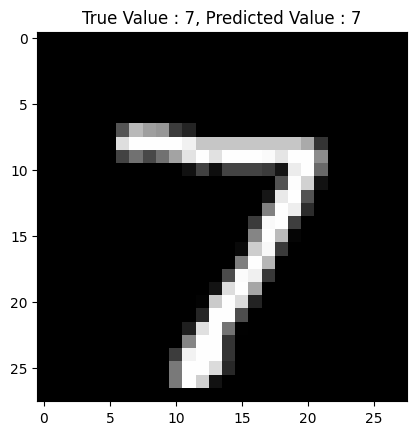

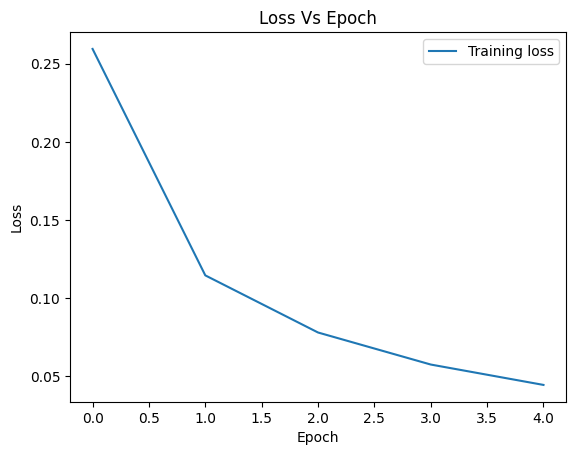

In [9]:
#Difference between plot and imshow :
#plot plots graph ,imshow shows images
#Plot the graph for x_test which is 28*28
plt.imshow(x_test[0], cmap='gray')
#plt.xticks(range(28))
#plt.yticks(range(28))
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(prediction[0])}")
plt.show()



#Plot graph between epoch and loss
plt.figure() # Add this line to create a new figure for the second plot
plt.plot(history.history['loss'],label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Vs Epoch')
plt.show()